In [29]:
# !pip install openai

In [30]:
from langchain_community.tools import (
    ArxivQueryRun
)

from langchain_community.utilities import ArxivAPIWrapper

In [31]:
arxiv = ArxivAPIWrapper()

docs = arxiv.run(
  "1706.03762" )

In [32]:
dir(arxiv)

['ARXIV_MAX_QUERY_LENGTH',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_computed_fields__',
 '__pydantic_core_schema__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__pydantic_root_model__',
 '__pydantic_serializer__',

In [33]:
docs

'Published: 2023-08-02\nTitle: Attention Is All You Need\nAuthors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin\nSummary: The dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks in an encoder-decoder configuration. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer, based\nsolely on attention mechanisms, dispensing with recurrence and convolutions\nentirely. Experiments on two machine translation tasks show these models to be\nsuperior in quality while being more parallelizable and requiring significantly\nless time to train. Our model achieves 28.4 BLEU on the WMT 2014\nEnglish-to-German translation task, improving over the existing best results,\nincluding ensembles by over 2 BLEU. On the WMT 2014 English-to-French\ntranslation task, our model establis

In [34]:
print(docs)

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, based
solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models to be
superior in quality while being more parallelizable and requiring significantly
less time to train. Our model achieves 28.4 BLEU on the WMT 2014
English-to-German translation task, improving over the existing best results,
including ensembles by over 2 BLEU. On the WMT 2014 English-to-French
translation task, our model establishes a new sing

In [35]:
dir(docs)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [42]:
import chromadb
import fitz
import os
# from sentence_transformers import SentenceTransformer
import networkx as nx
import requests
import time
import openai  # For LLM interaction

In [43]:
# --- Configuration ---
pdf_folder = "./papers"  # Replace with your PDF folder
collection_name = "academic_papers"
chunk_overlap = 50
embedding_model_name = 'all-MiniLM-L6-v2'
graph_data_file = "citation_graph.gpickle"
openai_api_key = "YOUR_OPENAI_API_KEY"  # Replace with your actual API key
llm_model_name = "gpt-3.5-turbo"  # Or another suitable model

In [44]:
# --- Initialize ChromaDB, Embedding Model, and OpenAI ---
client = chromadb.Client()
if collection_name in [c.name for c in client.list_collections()]:
    collection = client.get_collection(name=collection_name)
else:
    collection = client.create_collection(name=collection_name)
embedding_model = SentenceTransformer(embedding_model_name)
openai.api_key = openai_api_key

NameError: name 'SentenceTransformer' is not defined

In [46]:
# --- Graph Construction Functions (from Phase 1) ---
# (Keep these functions as they are)
# def extract_title_from_pdf(pdf_path):
#     try:
#         doc = fitz.open(pdf_path)
#         metadata = doc.metadata
#         if metadata and metadata.get("title"):
#             doc.close()
#             return metadata["title"]
#         if len(doc) > 0:
#             first_page_text = doc[0].get_text("text")
#             for line in first_page_text.splitlines():
#                 if len(line.strip()) > 20:
#                     doc.close()
#                     return line.strip()
#         doc.close()
#     except Exception as e:
#         print(f"Error extracting title from {pdf_path}: {e}")
    # return None

def extract_title_from_pdf(pdf_path):
    return "Attention is All You Need"  # Placeholder for actual title extraction logic


In [59]:
def get_openalex_id(title):
    if not title:
        return None
    base_url = "https://api.openalex.org/works"
    params = {"filter": f"title.search:{title}"}
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()
        # return data
        if data and 'results' in data and len(data['results']) > 0:
            best_match = data['results'][0]
            print(f"  OpenAlex Best Match Title: {best_match['title']}")
            return best_match
        else:
            print(f"  OpenAlex: No results found for title '{title}'")
            return None
    except requests.exceptions.RequestException as e:
        print(f"  Error querying OpenAlex for '{title}': {e}")
    return None

In [60]:
resp = get_openalex_id("Attention is All You Need")

  OpenAlex Best Match Title: Attention Is All You Need


In [61]:
resp

{'id': 'https://openalex.org/W4385245566',
 'doi': 'https://doi.org/10.48550/arxiv.1706.03762',
 'title': 'Attention Is All You Need',
 'display_name': 'Attention Is All You Need',
 'relevance_score': 25419.23,
 'publication_year': 2017,
 'publication_date': '2017-01-01',
 'ids': {'openalex': 'https://openalex.org/W4385245566',
  'doi': 'https://doi.org/10.48550/arxiv.1706.03762'},
 'language': 'en',
 'primary_location': {'is_oa': True,
  'landing_page_url': 'https://arxiv.org/abs/1706.03762',
  'pdf_url': None,
  'source': {'id': 'https://openalex.org/S4306400194',
   'display_name': 'arXiv (Cornell University)',
   'issn_l': None,
   'issn': None,
   'is_oa': True,
   'is_in_doaj': False,
   'is_indexed_in_scopus': False,
   'is_core': False,
   'host_organization': 'https://openalex.org/I205783295',
   'host_organization_name': 'Cornell University',
   'host_organization_lineage': ['https://openalex.org/I205783295'],
   'host_organization_lineage_names': ['Cornell University'],
   '

In [51]:
def get_citations_from_openalex(openalex_id):
    if not openalex_id:
        return {"cited_by": [], "references": []}
    citations = {"cited_by": [], "references": []}
    base_url = f"https://api.openalex.org/works/{openalex_id}"
    try:
        response = requests.get(base_url)
        response.raise_for_status()
        data = response.json()
        print(data)
        if 'cited_by' in data and data['cited_by']:
            citations['cited_by'] = data['cited_by']
        if 'references' in data and data['references']:
            citations['references'] = [ref['id'] for ref in data['references']]
    except requests.exceptions.RequestException as e:
        print(f"  Error getting citations for {openalex_id}: {e}")
    return citations

In [52]:
def get_citations_from_openalex_citation_url(citation_url):
    citations = {"cited_by": [], "references": []}
    if not citation_url:
        return citations
    
    
    try:
        response = requests.get(citation_url)
        response.raise_for_status()
        data = response.json()
        print(data)
        # Check if the response contains the expected fields
        if 'results' in data and len(data['results']) > 0:
            
            for result in data['results']:
                # print(f"  OpenAlex Best Match Title: {result['title']}")

                citations['cited_by']= result.get('id', [])
                citations['references'] = [ x for x in result.get('referenced_works', []) ]
        # if 'cited_by' in data and data['cited_by']:
        #     citations['cited_by'] = data['cited_by']
        # if 'references' in data and data['references']:
        #     citations['references'] = [ref['id'] for ref in data['references']]
    except requests.exceptions.RequestException as e:
        print(f"  Error getting citations for {citation_url}: {e}")
    return citations

In [63]:
resp['id']

'https://openalex.org/W4385245566'

In [65]:
resp['cited_by_api_url']

'https://api.openalex.org/works?filter=cites:W4385245566'

In [ ]:
resp['results'][0]['cited_by_api_url'].split(":")[-1]

'W4385245566'

In [ ]:
get_citations_from_openalex_citation_url(resp['results'][0]['cited_by_api_url'])

TypeError: string indices must be integers

In [ ]:
get_citations_from_openalex(resp['results'][0]['cited_by_api_url'].split(":")[-1])

{'id': 'https://openalex.org/W4385245566', 'doi': 'https://doi.org/10.48550/arxiv.1706.03762', 'title': 'Attention Is All You Need', 'display_name': 'Attention Is All You Need', 'publication_year': 2017, 'publication_date': '2017-01-01', 'ids': {'openalex': 'https://openalex.org/W4385245566', 'doi': 'https://doi.org/10.48550/arxiv.1706.03762'}, 'language': 'en', 'primary_location': {'is_oa': True, 'landing_page_url': 'https://arxiv.org/abs/1706.03762', 'pdf_url': None, 'source': {'id': 'https://openalex.org/S4306400194', 'display_name': 'arXiv (Cornell University)', 'issn_l': None, 'issn': None, 'is_oa': True, 'is_in_doaj': False, 'is_indexed_in_scopus': False, 'is_core': False, 'host_organization': 'https://openalex.org/I205783295', 'host_organization_name': 'Cornell University', 'host_organization_lineage': ['https://openalex.org/I205783295'], 'host_organization_lineage_names': ['Cornell University'], 'type': 'repository'}, 'license': 'other-oa', 'license_id': 'https://openalex.org/l

{'cited_by': [], 'references': []}

In [ ]:
# --- Chunking Function (from Phase 2) ---
# (Keep this function as it is)
def extract_chunks_from_pdf(pdf_path, overlap=50):
    try:
        doc = fitz.open(pdf_path)
        text = ""
        for page in doc:
            text += page.get_text()
        doc.close()

        chunks = []
        current_chunk = ""
        sentences = text.split('\n')

        for sentence in sentences:
            if len(current_chunk) + len(sentence) + 1 <= 500:
                current_chunk += sentence + '\n'
            else:
                chunks.append(current_chunk)
                current_chunk = sentence + '\n'

        if current_chunk:
            chunks.append(current_chunk)

        overlapped_chunks = []
        for i in range(len(chunks)):
          overlapped_chunks.append(chunks[i])
          if i > 0:
            overlapped_chunks[i] = chunks[i-1][-overlap:] + overlapped_chunks[i]
        return overlapped_chunks

    except Exception as e:
        print(f"Error extracting text from {pdf_path}: {e}")
        return []

In [ ]:
# --- Dual Retrieval Functions (from Phase 2) ---
def vector_retrieval(collection_obj, query_text, embedding_model, top_k=5):
    query_embedding = embedding_model.encode(query_text).tolist()
    results = collection_obj.query(
        query_embeddings=[query_embedding],
        n_results=top_k,
        include=["metadatas", "documents"]
    )
    return results

In [ ]:
def graph_retrieval(graph, query_text, top_k=3, max_hops=2):
    relevant_nodes = []
    for node in graph.nodes(data=True):
        node_id, node_data = node
        if "title" in node_data and query_text.lower() in node_data["title"].lower():
            relevant_nodes.append(node_id)

    expanded_nodes = set(relevant_nodes)
    for _ in range(max_hops):
        for node in list(expanded_nodes):
            for neighbor in nx.all_neighbors(graph, node):
                expanded_nodes.add(neighbor)

    expanded_nodes = list(expanded_nodes)
    expanded_papers = [{"id": node, **graph.nodes[node]} for node in expanded_nodes]

    return expanded_papers[:top_k]


In [ ]:
def fuse_and_rank_results(vector_results, graph_papers, top_n=5):
    fused_results = []

    for i in range(len(vector_results['documents'][0])):
        fused_results.append({
            "source": "vector_db",
            "content": vector_results['documents'][0][i],
            "metadata": vector_results['metadatas'][0][i],
            "relevance_score": vector_results['distances'][0][i]
        })

    for paper in graph_papers:
        fused_results.append({
            "source": "citation_graph",
            "content": f"Title: {paper.get('title', 'N/A')}",
            "metadata": {"openalex_id": paper.get('openalex_id', None)},
            "relevance_score": 0.7  # Slightly lower score for graph results in basic fusion
        })

    ranked_results = sorted(fused_results, key=lambda x: x['relevance_score']) # Lower score is better for distance
    ranked_results_without_score = [{k: v for k, v in res.items() if k != 'relevance_score'} for res in ranked_results]

    return ranked_results_without_score[:top_n]


In [ ]:
# --- LLM Integration and Response Generation (NEW) ---
def generate_answer(query, context_chunks, graph_context_papers, llm_model=llm_model_name):
    """Generates an answer using the LLM based on the retrieved context."""

    context_text = "\n\n".join([f"Source: {item['metadata'].get('source', 'N/A')}, Chunk ID: {item['metadata'].get('chunk_id', 'N/A')}\nContent: {item['content']}" for item in context_chunks if item['source'] == 'vector_db'])
    graph_context_text = "\n\n".join([f"Source: Citation Graph, Title: {item['content']}" for item in graph_context_papers])

    prompt = f"""You are an academic research assistant. Use the following context to answer the user's question. Cite the sources of your information if possible.

    Context from Research Papers:
    {context_text}

    Context from Citation Graph:
    {graph_context_text}

    User Question: {query}

    Answer:"""

    try:
        response = openai.ChatCompletion.create(
            model=llm_model,
            messages=[
                {"role": "system", "content": "You are a helpful research assistant."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.3,  # Adjust for more/less creative answers
        )
        return response.choices[0].message['content'].strip()
    except Exception as e:
        print(f"Error generating answer with LLM: {e}")
        return "Could not generate an answer at this time."

In [ ]:
# --- Explainability Module (NEW) ---
def create_explanation(retrieved_context):
    """Creates an explanation of the sources used to generate the answer."""
    explanation = "Sources used:\n"
    for item in retrieved_context:
        if item['source'] == 'vector_db':
            explanation += f"- Document: {item['metadata'].get('source', 'N/A')}, Chunk ID: {item['metadata'].get('chunk_id', 'N/A')}\n"
        elif item['source'] == 'citation_graph':
            explanation += f"- Citation Graph: Title: {item['content']}\n"
    return explanation

In [ ]:
# --- Main Execution ---
if __name__ == "__main__":
    # --- 1. Graph Construction (If graph file doesn't exist) ---
    if not os.path.exists(graph_data_file):
        pdf_files = [os.path.join(pdf_folder, filename) for filename in os.listdir(pdf_folder) if filename.endswith(".pdf")]
        if not pdf_files:
            print(f"Error: No PDF files found in '{pdf_folder}'.")
            exit()
        citation_graph = nx.DiGraph()
        paper_nodes = {}
        for pdf_file in pdf_files:
            print(f"Processing: {pdf_file}")
            extracted_title = extract_title_from_pdf(pdf_file)
            print(f"  Extracted title: {extracted_title}")
            if extracted_title:
                openalex_id = get_openalex_id(extracted_title)
                if openalex_id:
                    print(f"  Found OpenAlex ID: {openalex_id}")
                    citation_graph.add_node(openalex_id['id'], title=extracted_title, file_path=pdf_file, openalex_id=openalex_id)
                    paper_nodes[pdf_file] = openalex_id['id']
                    time.sleep(1)
                else:
                    print("  Could not find OpenAlex ID for this paper.")
            else:
                print("  Could not extract title from this paper.")
            break
        for pdf_file, source_id in paper_nodes.items():
            print(f"\nGetting citations for: {source_id} ({pdf_file})")
            # citations = get_citations_from_openalex(source_id)
            citations = get_citations_from_openalex_citation_url(openalex_id['cited_by_api_url'])

            print(citations)

            for cited_work_id in citations.get('references', []):
                if cited_work_id in citation_graph:
                    citation_graph.add_edge(source_id, cited_work_id, relation="cites")
                else:
                    try:
                        work_data = requests.get(f"https://api.openalex.org/works/{cited_work_id}").json()
                        if 'title' in work_data:
                            citation_graph.add_node(cited_work_id, title=work_data['title'], openalex_id=cited_work_id)
                            citation_graph.add_edge(source_id, cited_work_id, relation="cites")
                            time.sleep(0.5)
                    except Exception as e:
                        print(f"  Error fetching info for cited work {cited_work_id}: {e}")
            for citing_work_id in citations.get('cited_by', []):
                if citing_work_id in citation_graph:
                    citation_graph.add_edge(citing_work_id, source_id, relation="cited_by")
                else:
                    try:
                        work_data = requests.get(f"https://api.openalex.org/works/{citing_work_id}").json()
                        if 'title' in work_data:
                            citation_graph.add_node(citing_work_id, title=work_data['title'], openalex_id=citing_work_id)
                            citation_graph.add_edge(citing_work_id, source_id, relation="cited_by")
                            time.sleep(0.5)
                    except Exception as e:
                        print(f"  Error fetching info for citing work {citing_work_id}: {e}")
            time.sleep(1)
        # Save the citation graph to a file
        print(f"Saving citation graph to '{graph_data_file}'...")
        # nx.write_gpickle(citation_graph, graph_data_file)
        print("\nCitation Graph Construction Complete.")
        print(f"Number of nodes in the graph: {citation_graph.number_of_nodes()}")
        print(f"Number of edges in the graph: {citation_graph.number_of_edges()}")
        print("Citation graph constructed and saved.")
    else:
        citation_graph = nx.read_gpickle(graph_data_file)
        print("Citation graph loaded from file.")

    # # --- 2. Chunking (If collection is empty) ---
    # if collection.count() == 0:
    #     pdf_files = [os.path.join(pdf_folder, filename) for filename in os.listdir(pdf_folder) if filename.endswith(".pdf")]
    #     if not pdf_files:
    #         print(f"Error: No PDF files found in '{pdf_folder}'.")
    #         exit()
    #     all_chunks = []
    #     all_embeddings = []
    #     all_metadatas = []
    #     all_ids = []
    #     for pdf_file in pdf_files:
    #         print(f"Processing: {pdf_file}")
    #         chunks = extract_chunks_from_pdf(pdf_file, overlap=chunk_overlap)
    #         for i, chunk in enumerate(chunks):
    #             embedding = embedding_model.encode(chunk).tolist()
    #             all_chunks.append(chunk)
    #             all_embeddings.append(embedding)
    #             all_metadatas.append({"source": pdf_file, "chunk_id": i})
    #             all_ids.append(f"{os.path.basename(pdf_file)}-{i}")
    #     collection.add(
    #         documents=all_chunks,
    #         embeddings=all_embeddings,
    #         metadatas=all_metadatas,
    #         ids=all_ids
    #     )
    #     print(f"Added {collection.count()} chunks to ChromaDB.")
    # else:
    #     print(f"ChromaDB collection '{collection_name}' already populated ({collection.count()} chunks).")

    # # --- 3. Dual Retrieval ---
    # user_query = "How is attention different from previous sequence models?"
    # print(f"\n--- Dual Retrieval for Query: '{user_query}' ---")
    # vector_results = vector_retrieval(collection, user_query, embedding_model)
    # graph_papers = graph_retrieval(citation_graph, user_query)
    # retrieved_context = fuse_and_rank_results(vector_results, graph_papers)

    # print("\nRetrieved Context:")
    # for item in retrieved_context:
    #     print(f"  Source: {item['source']}")
    #     print(f"  Content: {item['content'][:100]}...")
    #     print(f"  Metadata: {item['metadata']}")
    #     print("-" * 20)

    # # --- 4. LLM Generation ---
    # answer = generate_answer(user_query, retrieved_context, graph_papers)
    # print(f"\n--- LLM Generated Answer: ---\n{answer}")

    # # --- 5. Explainability ---
    # explanation = create_explanation(retrieved_context)
    # print(f"\n--- Explanation: ---\n{explanation}")
    



Processing: ./papers/1502.03167v3.pdf
  Extracted title: Attention is All You Need
  OpenAlex Best Match Title: Attention Is All You Need
  Found OpenAlex ID: {'id': 'https://openalex.org/W4385245566', 'doi': 'https://doi.org/10.48550/arxiv.1706.03762', 'title': 'Attention Is All You Need', 'display_name': 'Attention Is All You Need', 'relevance_score': 25419.23, 'publication_year': 2017, 'publication_date': '2017-01-01', 'ids': {'openalex': 'https://openalex.org/W4385245566', 'doi': 'https://doi.org/10.48550/arxiv.1706.03762'}, 'language': 'en', 'primary_location': {'is_oa': True, 'landing_page_url': 'https://arxiv.org/abs/1706.03762', 'pdf_url': None, 'source': {'id': 'https://openalex.org/S4306400194', 'display_name': 'arXiv (Cornell University)', 'issn_l': None, 'issn': None, 'is_oa': True, 'is_in_doaj': False, 'is_indexed_in_scopus': False, 'is_core': False, 'host_organization': 'https://openalex.org/I205783295', 'host_organization_name': 'Cornell University', 'host_organization_l

ValueError: Expected Embeddings to be non-empty list or numpy array, got [] in add.

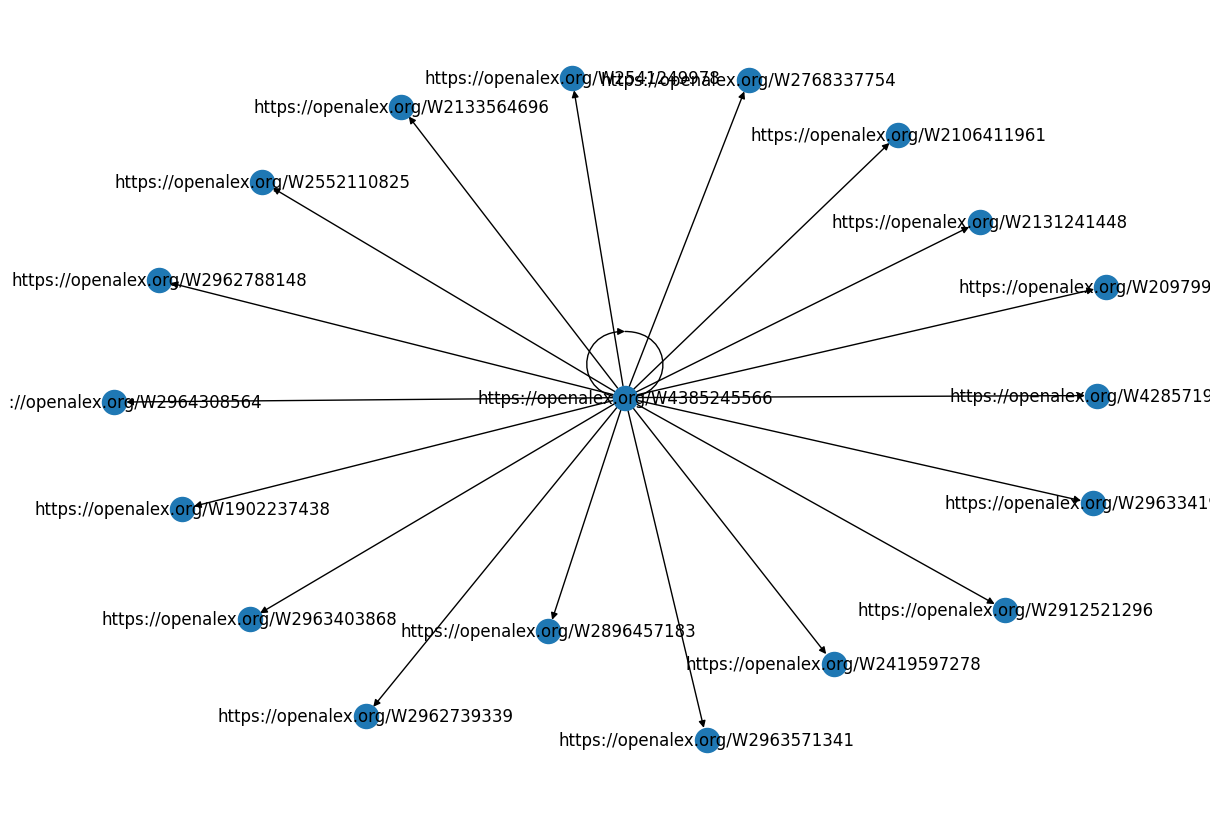

In [69]:
# You can now further analyze or visualize the graph (e.g., using matplotlib with NetworkX)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
nx.draw(citation_graph, with_labels=True)
plt.show()